# DSE Course 1 Project: Simple Regression and Exploratory Data Analysis

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com

<br>

---

<br>

Our project task is to apply the tools we've learned so far on our own dataset. If you haven't a dataset in mind of your own, you may explore or choose from some that we suggest.

<br>

---

<br>

Data Repositories

* [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=comp&numAtt=&numIns=&type=&sort=attUp&view=list)
* [kaggle](https://www.kaggle.com/datasets)

Datasets

* [Condition Based Maintenance of Naval Propulsion Plants Data Set](http://archive.ics.uci.edu/ml/datasets/condition+based+maintenance+of+naval+propulsion+plants)
* [Robot Execution Failures Data Set](https://archive.ics.uci.edu/ml/datasets/Robot+Execution+Failures)




# Choosing a Dataset

## What should I be looking for?

  * Size
  * Missing Values
  * Types of Features
  * Relevance to Field
  * Relevance to Domain Area Expertise

# Objectives



## Exploratory Data Analysis and Statistical Inference

So far we've introduced several programming tools to explore data:

  * _pandas, numpy, matplotlib, seaborn, ipywidgets, statsmodel, scipy_

We've also introduced several analysis techniques:

  * _ANOVA, t-tests, f-tests, moods median, variance inflation factor_

and plotting techniques:

  * _boxplot, distributions, histograms, heatmaps, pairity plots_

**In your project, include at least 2 tools form each of these bullets.**

## Predictive Modeling

We've introduced two modeling techniques, linear and logistic regression. You are welcome to push forward with other modeling techniques if you wish. But the idea here is to build a simple base model to compare with more advanced models we develop going forward

Some tools to recall:

  * univariate and multivariate linear and logistic regression
  * binary and multiclass logistic regression

for assessing goodness of fit:

  * $MSE, R^2$ for regression
  * Accuracy, F1, precision, and recall for classification

Also common development strategies:

  * splitting into training and testing datasets
  * adding and removing features to improve performance

**In your project, include a predictive modeling technique (either classification or regression depending on the dataset you choose)**

<br>

---

# To Complete

<a name="prepare"></a>
## Preparing Environment and Importing Data
[back to top](#top)

<a name='packages'></a>
### Import Packages
[back to top](#top)

Load libraries which will be needed in this Notebook



In [20]:
# Pandas library for the pandas dataframes
from copy import copy
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import random
import scipy.stats as stats
from scipy.stats import skew, norm, probplot, boxcox, f_oneway, median_test
import seaborn as sns
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from ipywidgets import interact, widgets
from statsmodels.formula.api import ols
import statsmodels.api as sm

<a name='dataset'></a>
### Load Dataset
[back to top](#top)


In [21]:
# from google.colab import drive
# drive.mount("/content/drive")

In [22]:
df = pd.read_csv('C:/Users/Matth/Documents/GitHub/C2Lab2/Project/DSFE_Mellin/data/superconductivity.csv')

# df = pd.read_csv('/content/drive/MyDrive/DSFE/C1 Build Your Base_Mellin/DataSets/superconductivity.csv')



<a name='eda'></a>
## Exploratory Data Analysis (EDA)
[back to top](#top)

In [23]:
# from google.colab import drive
# drive.mount('/content/drive')

In [24]:
df.describe()
# len(df)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [25]:
# dff = df.corr()['critical_temp']
# pear = abs(pear.sort_values(ascending=False))
# pear
def desc(df, group=None, target=None):
  """
  there should be a docstring!!!
  """
  if group == None:
    skew = df.skew()
    kurt = df.kurtosis()
    pear = df.corr()['critical_temp']
    spear = df.corr('spearman')['critical_temp']
    null = df.isnull().sum()
    med = df.median()

    dff = pd.DataFrame([skew, kurt, pear, spear, med])
    dff = dff.T
    dff.columns = ['skew', 'kurtosis', 'pearsons_ct', 'spearman_ct', 'median']
  else:
    dff = pd.DataFrame()
    for cat in df[group].unique():
      subdf = df.loc[mydf[group] == cat]
      subdf = subdf.drop([group],axis=1)
      skew = subdf.skew()
      kurt = subdf.kurtosis()
      pear = subdf.corr()['critical_temp']
      spear = subdf.corr('spearman')['critical_temp']
      null = subdf.isnull().sum()
      med = subdf.median()

      dfff = pd.DataFrame([skew, kurt, pear, spear, med])
      dfff = dfff.T
      dfff.columns = ['skew', 'kurtosis', 'pearsons ct', 'spearman ct', 'median']
      arrays = [[cat]*len(list(dfff.index)),list(dfff.index.values)]
      tuples = list(zip(*arrays))
      index = pd.MultiIndex.from_tuples(tuples, names=[group, "feature"])
      dfff.index = index
      dff = pd.concat([dff, dfff])
  return dff
  # desc(df)


In [26]:
statsdf = pd.DataFrame(desc(df))
statsdf['pearsons_ct']

number_of_elements       0.601069
mean_atomic_mass        -0.113523
wtd_mean_atomic_mass    -0.312272
gmean_atomic_mass       -0.230345
wtd_gmean_atomic_mass   -0.369858
                           ...   
range_Valence           -0.143546
wtd_range_Valence       -0.439901
std_Valence             -0.208072
wtd_std_Valence         -0.300028
critical_temp            1.000000
Name: pearsons_ct, Length: 82, dtype: float64

wtd_std_ThermalConductivity    0.721271
range_ThermalConductivity      0.687654
range_atomic_radius            0.653759
std_ThermalConductivity        0.653632
wtd_entropy_atomic_mass        0.626930
                                 ...   
gmean_Density                 -0.541684
gmean_Valence                 -0.573068
mean_Valence                  -0.600085
wtd_gmean_Valence             -0.615653
wtd_mean_Valence              -0.632401
Name: pearsons_ct, Length: 81, dtype: float64

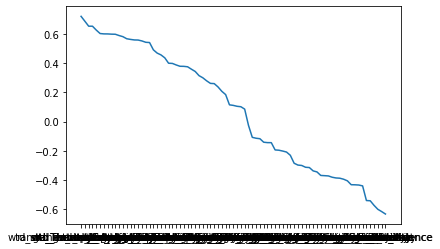

In [27]:
vals = statsdf['pearsons_ct'].values
pears_sorted = statsdf.sort_values('pearsons_ct',ascending=False)
pears_sorted2 = pears_sorted.drop(labels='critical_temp', axis=0)
plt.plot(pears_sorted2['pearsons_ct'])
pears_sorted2['pearsons_ct']

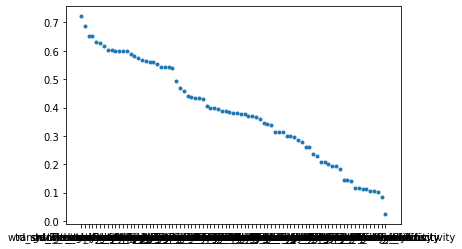

In [28]:
test_vars = []
pears_abs = abs(statsdf['pearsons_ct'])
pears_abs2 = pears_abs.drop(labels='critical_temp', axis=0)
all_pears = pears_abs2.sort_values(axis=0, ascending=False)
# type(all_pears)
all_pears
plt.plot(all_pears, marker='.', ls='')
#Goal is to get an approximation of how many of the large number
#of variables have a reasonaby high Pearson's correlation

In [29]:
test_vars = []
print(len(test_vars))
print(len(all_pears))
# for i in all_pears:
#   if all_pears[i] > 0.4:
#     test_vars.append(all_pears.index[i])
x = all_pears.ge(0.4)
type(x)
X = pd.concat([all_pears,x], axis=1)
X
q = -1
for i in all_pears:
  q += 1
  if i > 0.4:
    test_vars.append(all_pears.index[q])

print(len(test_vars))
print(test_vars)
# all_pears.index[1]

0
81
35
['wtd_std_ThermalConductivity', 'range_ThermalConductivity', 'range_atomic_radius', 'std_ThermalConductivity', 'wtd_mean_Valence', 'wtd_entropy_atomic_mass', 'wtd_gmean_Valence', 'wtd_entropy_atomic_radius', 'number_of_elements', 'range_fie', 'mean_Valence', 'wtd_std_atomic_radius', 'entropy_Valence', 'wtd_entropy_Valence', 'wtd_std_fie', 'gmean_Valence', 'entropy_fie', 'wtd_entropy_FusionHeat', 'std_atomic_radius', 'entropy_atomic_radius', 'entropy_FusionHeat', 'entropy_atomic_mass', 'std_fie', 'gmean_Density', 'wtd_gmean_Density', 'range_atomic_mass', 'wtd_range_ThermalConductivity', 'entropy_Density', 'wtd_range_Valence', 'entropy_ElectronAffinity', 'wtd_mean_Density', 'wtd_gmean_FusionHeat', 'gmean_FusionHeat', 'wtd_gmean_atomic_radius', 'wtd_entropy_Density']


<a name='statistics'></a>
### Descriptive Statistics
[back to top](#top)

In [30]:
def VIF(df, test_vars):
  #Add intercept for Ordinary Least Squares regression in stat models
  Y = df[test_vars].assign(constant=1)
  
  #Calculate VIFs
  vif = pd.DataFrame()
  vif['VIF Factor'] = [variance_inflation_factor(Y.values, i) for i in range (Y.shape[1])]
  vif["features"] = Y.columns
  return vif.iloc[:-1].sort_values("VIF Factor") 

In [31]:
A = VIF(df, test_vars)
A

,VIF Factor,features
26,4.167221,wtd_range_ThermalConductivity
25,6.612003,range_atomic_mass
28,6.940455,wtd_range_Valence
29,7.487150,entropy_ElectronAffinity
33,9.028876,wtd_gmean_atomic_radius
32,9.551335,gmean_FusionHeat
31,10.349068,wtd_gmean_FusionHeat
17,15.749815,wtd_entropy_FusionHeat
34,18.849615,wtd_entropy_Density
20,23.885841,entropy_FusionHeat


In [32]:
#Let's systematically remove variables with high VIF until the max VIF 
#is less than 5
subf = copy(test_vars)
for feature in df:
  VIF(df, subf)
  if VIF(df, subf)['VIF Factor'].iloc[-1] >= 5:
    b = VIF(df, subf)['features'].iloc[-1]
    subf.remove(b)
  else:
    c = VIF(df, subf)
    break
c

,VIF Factor,features
5,1.707195,wtd_range_Valence
8,1.775101,gmean_FusionHeat
4,2.053621,wtd_range_ThermalConductivity
3,2.255358,range_atomic_mass
10,2.833221,wtd_entropy_Density
0,3.274232,std_ThermalConductivity
6,3.329200,entropy_ElectronAffinity
9,3.515913,wtd_gmean_atomic_radius
2,3.671127,std_atomic_radius
1,3.751238,gmean_Valence


<a name='infer'></a>
### Inferential Statistics

[back to top](#top)

In [33]:
#Perform inferential statistics on the variables with low VIF Factor
Inf_df = df.filter(items=c['features'])
# Inf_df.drop(labels = 'wtd_range_Valence', axis = 1)
#Perform Moods Median Test on gmean_FusionHeat versus gmean_Valence
stat, p, m, table = stats.median_test(Inf_df['gmean_FusionHeat'], Inf_df['gmean_Valence'], correction=False)
print("The perasons chi-square test statistic: {:.2f}".format(stat))
print("p-value of the test: {:.3f}".format(p))
print("the grand median: {}".format(m))

The perasons chi-square test statistic: 15908.40
p-value of the test: 0.000
the grand median: 4.0


<a name='modeling'></a>
## Modeling
[back to top](#top)

Fit coefficients: 
 [-2.54566177e+00 -1.53927681e-01  1.20333393e-01  9.76739617e-02
  1.51364678e+01  1.81698240e-01 -1.42534161e+01  1.47893002e-01
  2.27424863e-01 -3.86771216e+00 -1.04930837e-03] 
Number of coefficients: 11
Mean squared error: 529.06
Coefficient of determination: 0.54


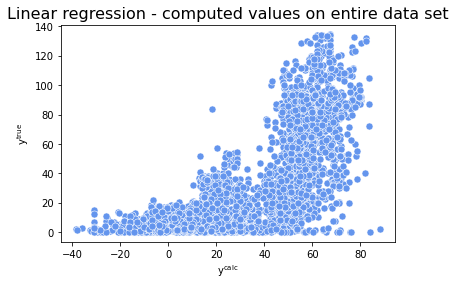

In [34]:
#Fit a Linear regression for the fatures to critical temp
X_train, X_test, y_train, y_test = train_test_split(Inf_df, df['critical_temp'], test_size=0.20, random_state=42)
regr = sklearn.linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
print("Fit coefficients: \n", regr.coef_, "\nNumber of coefficients:", len(regr.coef_))
print('Mean squared error: %.2f' % mean_squared_error(y_test, regr.predict(X_test)))
print('Coefficient of determination: %.2f' % r2_score(y_test, regr.predict(X_test)))
# Scatterplot
sns.scatterplot(x=regr.predict(X_test),y=y_test, color="cornflowerblue", s=50)
plt.title("Linear regression - computed values on entire data set", fontsize=16)
plt.xlabel("y$^{\sf calc}$")
plt.ylabel("y$^{\sf true}$")
plt.show()
